<a href="https://colab.research.google.com/github/Deepak-Data-Scientist-IIT/Pre-Processing-Data-from-Scratch/blob/master/Pre_Processing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Dataset**

In [1]:
# Importing Libraries
import pandas as pd

In [50]:
# Loading the data
data = pd.read_csv('titanic_train.csv',index_col=1)
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Missing Values**

In [51]:
# Check missing values in the data
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 * Age and Cabin have a very high number of missing values
 * Embarked has very low number of missing values 

# **Deleting Data Points/rows with missing values**

In [52]:
# Age Variable without missing value treatment
data['Age'].head(8)

Survived
0    22.0
1    38.0
1    26.0
1    35.0
0    35.0
0     NaN
0    54.0
0     2.0
Name: Age, dtype: float64

In [53]:
# Dropping all rows with missing value
data_row_del = data.dropna(axis=0)
data_row_del['Age'].head(8)

Survived
1    38.0
1    35.0
0    54.0
1     4.0
1    58.0
1    34.0
1    28.0
0    19.0
Name: Age, dtype: float64

* Have Deleted rows, If any one column/features has missing values in that row

In [54]:
# Shape Before and after removing missing values
data.shape, data_row_del.shape

((891, 11), (183, 11))

* Significant Loss of information
* Only three columns had missing values

# **Deleting Column with missing values**

In [55]:
# Check missing values with ratio
data.isnull().sum()/891

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [56]:
data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
0,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
0,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
0,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
1,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [57]:
data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [58]:
# Dropping all columns with missing values
data_col_del = data.dropna(thresh=500, axis=1)
data_col_del.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Survived,,,,,,,,,,
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


* axis = 1 is used for columns 
* axis = 0 is used for rows

* Thresh hold value is used because if a column has atleast 500 missing value that mean delete only those column
* if we are not using thresh hold values it means all the column which have even a column has single missing values will be deleted

In [59]:
# Shape before and after removing missing values
data.shape, data_col_del.shape

((891, 11), (891, 10))

* A better way to deal with missing values without loss of information

# **Replace with a new category/value**

In [60]:
data['Cabin'].head()

Survived
0     NaN
1     C85
1     NaN
1    C123
0     NaN
Name: Cabin, dtype: object

In [61]:
data['Cabin'].fillna(value='missing')

Survived
0    missing
1        C85
1    missing
1       C123
0    missing
      ...   
0    missing
1        B42
0    missing
1       C148
0    missing
Name: Cabin, Length: 891, dtype: object

In [62]:
data['Age'].fillna(value=999)

Survived
0     22.0
1     38.0
1     26.0
1     35.0
0     35.0
     ...  
0     27.0
1     19.0
0    999.0
1     26.0
0     32.0
Name: Age, Length: 891, dtype: float64

In [63]:
# Make a copy
data_replace = data.copy()

# replace values
data_replace['Age']= data_replace['Age'].fillna(value=999)
data_replace.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
data_replace['Cabin_na'] = (data['Cabin'].isnull()).astype('int')

In [65]:
data_replace.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_na
Survived,,,,,,,,,,,,
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


# **Imputing missing values using central tendency**

In [66]:
# Finding mean value
mean_val = data['Age'].mean()
mean_val

29.69911764705882

In [67]:
# Making a copy
data_cleaned = data.copy()

# Imputing missing values
data_cleaned['Age'] = data['Age'].fillna(value = mean_val)
data_cleaned['Age'].isnull().sum()

0

In [68]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [69]:
mode_val = data['Embarked'].mode()[0]
mode_val

'S'

In [70]:
data_cleaned['Embarked']= data['Embarked'].fillna(value = mode_val)

# **Using relationship with other features(s)**

* During Exploration, did we find a high dependeny on other varibales?
* fare can imputed based on PClass wise mean(not overall mean)

In [29]:
# find out correlation of all the features
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [30]:
(data[['Name','Age']].loc[(data['Age'].isnull()>0)]).head(20)

,Name,Age
5,"Moran, Mr. James",NaN
17,"Williams, Mr. Charles Eugene",NaN
19,"Masselmani, Mrs. Fatima",NaN
26,"Emir, Mr. Farred Chehab",NaN
28,"O'Dwyer, Miss. Ellen ""Nellie""",NaN
29,"Todoroff, Mr. Lalio",NaN
31,"Spencer, Mrs. William Augustus (Marie Eugenie)",NaN
32,"Glynn, Miss. Mary Agatha",NaN
36,"Mamee, Mr. Hanna",NaN
42,"Kraeff, Mr. Theodor",NaN


# **Dealing with Categorical Values**

In [71]:
# Categorical variable in data
data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [72]:
categorical_cols = ['Name','Sex','Ticket','Cabin','Embarked']

In [73]:
# Number of unique values
data[categorical_cols].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

* Can one-hot-encode Sex and Embarked
* Deal with them differently(extract features)
* Name, Ticket and Cabin (when encoded) will have Zeros

# **One-hot-Encoding**

In [74]:
pd.get_dummies(data['Embarked']).head()

,C,Q,S
Survived,,,
0,0,0,1
1,1,0,0
1,0,0,1
1,0,0,1
0,0,0,1


In [76]:
data_cleaned = data_cleaned.drop(['Name', 'Ticket', 'Cabin'],axis=1)

In [77]:
data_cleaned= pd.get_dummies(data_cleaned)
data_cleaned.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,,,,,,,,,,,
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
1,3,3,26.0,0,0,7.9250,1,0,0,0,1
1,4,1,35.0,1,0,53.1000,1,0,0,0,1
0,5,3,35.0,0,0,8.0500,0,1,0,0,1


* SibSp and Parch hold a descrite values
* We can convert them into seprate column as well

# **Label Encoding**

In [78]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
# Map Function
data['Embarked'].map({'Q':0,'S':1,'C':2})

Survived
0    1.0
1    2.0
1    1.0
1    1.0
0    1.0
    ... 
0    1.0
1    1.0
0    1.0
1    2.0
0    0.0
Name: Embarked, Length: 891, dtype: float64

In [81]:
data['Embarked']= data['Embarked'].map({'Q':0,'S':1,'C':2})
data['Embarked'].head()

Survived
0    1.0
1    2.0
1    1.0
1    1.0
0    1.0
Name: Embarked, dtype: float64

# **Outlier Treatment**

In [82]:
# Loading the data
data = pd.read_csv('titanic_train.csv',index_col=1)
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Fare has some extreme values

In [84]:
data['Fare'].quantile(0.25), data['Fare'].quantile(0.75)

(7.9104, 31.0)

In [85]:
IQR = data['Fare'].quantile(0.75) - data['Fare'].quantile(0.25)
IQR

23.0896

In [86]:
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)

whisker_1 = Q1 - (1.5*IQR)
whisker_2 = Q3 + (1.5*IQR)

whisker_1, whisker_2

(-26.724, 65.6344)

* Any Value above this whisker will be an outlier

# **Delete Outliers**

In [88]:
data.loc[data['Fare']>66]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
0,28,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
1,32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
0,35,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
1,53,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...
0,847,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
1,850,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
1,857,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


In [89]:
data_new = data.loc[data['Fare']<66]
data.shape, data_new.shape

((891, 11), (775, 11))

# **Replacing Outliers**

In [90]:
data['Fare'].loc[data['Fare']<7]

Survived
0    6.9750
0    6.7500
0    0.0000
0    6.4958
0    0.0000
1    0.0000
0    0.0000
0    0.0000
0    6.2375
0    6.4958
0    4.0125
0    6.8583
0    0.0000
0    0.0000
0    0.0000
0    0.0000
0    0.0000
0    6.7500
0    0.0000
0    0.0000
1    6.9750
0    0.0000
0    0.0000
0    6.4500
0    0.0000
0    6.9500
0    6.4375
0    5.0000
Name: Fare, dtype: float64

In [91]:
data['Fare'].loc[data['Fare']<7] = Q1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [92]:
data['Fare'].loc[data['Fare']<7]

Series([], Name: Fare, dtype: float64)

In [94]:
data['Fare'][0]

0     7.2500
0     8.0500
0     8.4583
0    51.8625
0    21.0750
      ...   
0     7.0500
0    29.1250
0    13.0000
0    23.4500
0     7.7500
Name: Fare, Length: 549, dtype: float64

# **Transforming Variables**

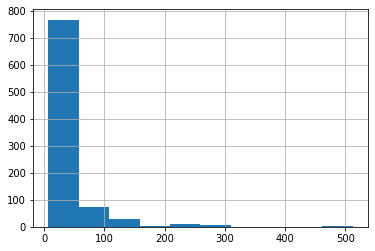

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline
data['Fare'].hist()

In [96]:
import numpy as np

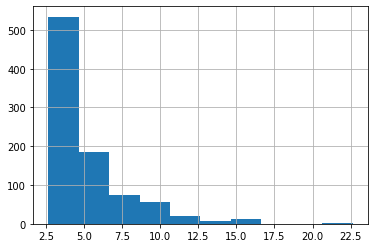

In [97]:
(np.sqrt(data['Fare'])).hist()

In [99]:
data_new.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,775.000000,775.00000,613.000000,775.000000,775.000000,775.000000
mean,445.806452,2.48000,28.946574,0.437419,0.340645,17.822091
std,260.116285,0.73439,14.368139,0.899838,0.785914,13.578085
min,1.000000,1.00000,0.420000,0.000000,0.000000,0.000000
25%,213.500000,2.00000,20.000000,0.000000,0.000000,7.895800
50%,450.000000,3.00000,28.000000,0.000000,0.000000,13.000000
75%,670.500000,3.00000,37.000000,1.000000,0.000000,26.000000
max,891.000000,3.00000,80.000000,5.000000,6.000000,65.000000
